Done by Wong Wen Bing, 230436M

# **Part 1: Data Preparation and Understanding** 
This section will comprise of the data understanding and data preparation conducted

In [19]:
# pip install pandas seaborn nltk matplotlib openpyxl

In [20]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [21]:
# nltk.download('all')

Reading in data and understanding data

In [22]:
data=pd.read_excel('Data.xlsx')
data

,description,species
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna
1,Click here for more information about the Red ...,Collared Kingfisher
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna
4,521 foreground recordings and 156 background ...,Little Egret
...,...,...
737,"August 13, 2016 - HISTORICAL records show that...",Little Egret
738,File: Black-naped Oriole (Oriolus chinensis ch...,Black-naped Oriole
739,Larger than a Cattle Egret and with black leg...,Little Egret
740,22 Oct 2023 ï¿½ Dragon Snake (Javan Tubercle S...,Javan Myna


In [23]:
data.shape

(742, 2)

From the above, we can infer that there are 2 columns and a total of 742 rows

**Checking for null and duplicates**  
- there might be some empty values or duplicate values that we need to check for

In [24]:
data.isna().sum()

description    24
species         0
dtype: int64

In [25]:
dup=data.duplicated().value_counts()
print(f'''
duplicates: {dup[True]}
unique: {dup[False]}
''')


duplicates: 128
unique: 614



From the above output we can infer the below: 
- there are 24 null values
- there are 128 duplicates

**Removing null and duplicate values** 
- To ensure data integrity, null and duplicate values are remove

In [26]:
#drop null and duplicate values
data=data.dropna()
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 739
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  611 non-null    object
 1   species      611 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


#### **Data Understanding** 
- To understand the distribution of data, I set out to do some visualisations to visualise the distribution of the dataset.

Firstly, we did a distribution of the species (the target variable in the dataset.)

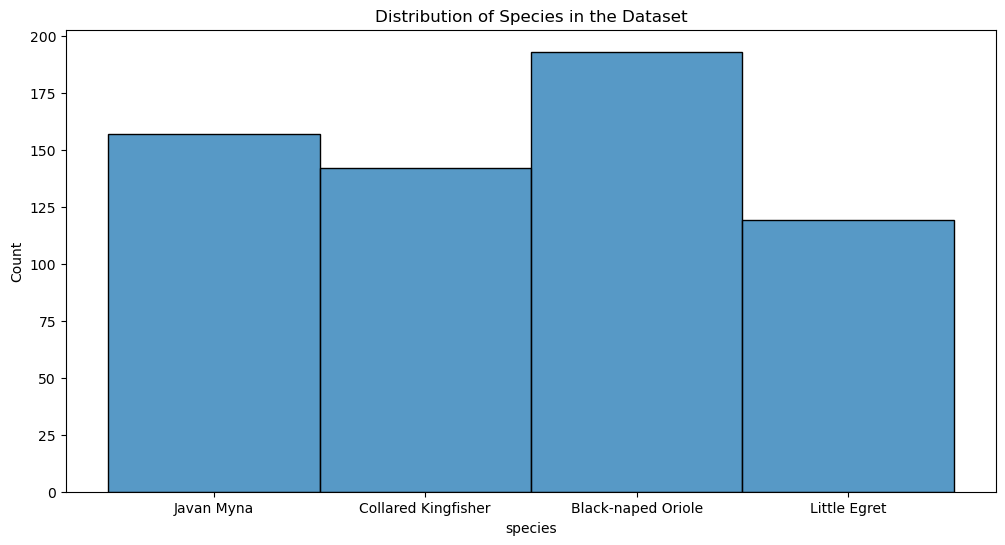

In [27]:
group=data.groupby(['species']).count()
plt.figure(figsize=(12, 6))  
sns.histplot(data['species'])
plt.title('Distribution of Species in the Dataset')
plt.show()

As we can see from above, we can realise that the Black-napled Oriole has the most records in the dataset. 
This means that there is a probability of biasedness in the dataset. 

Now, we are going to investigate the aaverage length of data in the dataset

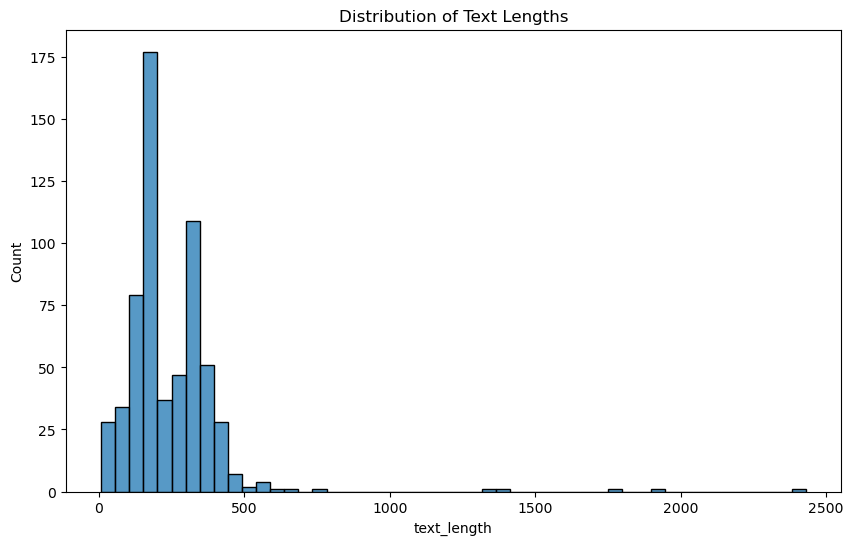

In [28]:
data['text_length'] = data['description'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.show()

## **Data Pre-Processing** 
- After examining the data, we now will conduct pre-processing of the data. The pre-processing steps include: 
1. removing of stopwords
2. removing special characters in word

In [29]:
from nltk.corpus import stopwords #stopwords
from nltk.stem.wordnet import WordNetLemmatizer #lemmatization

lemma=WordNetLemmatizer() #lemmatization
stopwordss=stopwords.words('english') #list of stopwords
# exclude=set(string.punctuation) #punctuations

def preprocess_text(text):
    stopwordss=list(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    # text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    # text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s\s+',' ', text)
    words=word_tokenize(text)
    text=[]
    for word in words: 
        if word not in stopwordss: 
            normalized = lemma.lemmatize(word)
            text.append(normalized)
    return ' '.join(text)
data['cleaned_text']=''
data.head()

,description,species,text_length,cleaned_text
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,
1,Click here for more information about the Red ...,Collared Kingfisher,398,
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,
4,521 foreground recordings and 156 background ...,Little Egret,112,


In [30]:
# Apply preprocessing
data['cleaned_text'] = data['description'].apply(lambda x: preprocess_text(x))
data.head()

,description,species,text_length,cleaned_text
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,jun javan myna share similarity common myna te...
1,Click here for more information about the Red ...,Collared Kingfisher,398,click information red list category criterion ...
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,black headed oriole oriolus larvatus specie bi...
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,search thousand royalty free javan myna stock ...
4,521 foreground recordings and 156 background ...,Little Egret,112,foreground recording background recording egre...


Using MWE Tokenizer 
- this ensures the retention of the meaning

In [73]:
# import MWETokenizer() method from nltk 
from nltk.tokenize import MWETokenizer 

#multi-class
mw=[('black','headed'),('black','headed','oriole'), ('javan', 'myna')]

# Create a reference variable for Class MWETokenizer 
tk = MWETokenizer(mw) 

def using_mwe(x):
    txt=[]
    texts = tk.tokenize(x.split(' '))
    for text in texts: 
        txt.append(text)
    return ' '.join(txt)

# Use tokenize method 
data['chunked']=data['cleaned_text'].apply(using_mwe)

In [74]:
data.head()

,description,species,text_length,cleaned_text,chunked
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,jun javan myna share similarity common myna te...,jun javan_myna share similarity common myna te...
1,Click here for more information about the Red ...,Collared Kingfisher,398,click information red list category criterion ...,click information red list category criterion ...
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,black headed oriole oriolus larvatus specie bi...,black_headed_oriole oriolus larvatus specie bi...
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,search thousand royalty free javan myna stock ...,search thousand royalty free javan_myna stock ...
4,521 foreground recordings and 156 background ...,Little Egret,112,foreground recording background recording egre...,foreground recording background recording egre...


Investigating word count

In [75]:
# pip install wordcloud

In [76]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
txt=data['chunked'].tolist() #convert dataframe columns to list
txt=' '.join(txt)
print(txt)

jun javan_myna share similarity common myna term physical appearance however distinguished frontal click information red list category criterion justification red list category specie extremely large range hence approach threshold vulnerable range size criterion extent occurrence km combined declining fluctuating range size habitat extent quality population size small number black_headed_oriole oriolus larvatus specie bird family oriolidae found africa striking appearance bright yellow body contrasting black head flesh coloured beak taxonomy systematics edit authority considered mountain oriole subspecies black_headed search thousand royalty free javan_myna stock image video next project download royalty free stock photo vector hd footage adobe stock foreground recording background recording egretta garzetta total recording duration little egret egretta garzetta small white heron belonging family ardeidae little egret distributed asia indian subcontinent europe africa australia survey 

In [79]:
def tagPOS(text):
    tags=[]
    wordsList = nltk.word_tokenize(text)  # Word tokenizers is used to find the words 
    tagged = nltk.pos_tag(wordsList)      #  Using a Tagger. Which is part-of-speech tagger or POS-tagger.  
    tags.append(tagged)
    return tags

tagPOS(txt)

[[('jun', 'NN'),
  ('javan_myna', 'NN'),
  ('share', 'NN'),
  ('similarity', 'NN'),
  ('common', 'JJ'),
  ('myna', 'JJ'),
  ('term', 'NN'),
  ('physical', 'JJ'),
  ('appearance', 'NN'),
  ('however', 'RB'),
  ('distinguished', 'VBD'),
  ('frontal', 'JJ'),
  ('click', 'NN'),
  ('information', 'NN'),
  ('red', 'JJ'),
  ('list', 'NN'),
  ('category', 'NN'),
  ('criterion', 'NN'),
  ('justification', 'NN'),
  ('red', 'JJ'),
  ('list', 'NN'),
  ('category', 'NN'),
  ('specie', 'NN'),
  ('extremely', 'RB'),
  ('large', 'JJ'),
  ('range', 'NN'),
  ('hence', 'NN'),
  ('approach', 'NN'),
  ('threshold', 'VBD'),
  ('vulnerable', 'JJ'),
  ('range', 'NN'),
  ('size', 'NN'),
  ('criterion', 'NN'),
  ('extent', 'NN'),
  ('occurrence', 'NN'),
  ('km', 'NN'),
  ('combined', 'VBD'),
  ('declining', 'VBG'),
  ('fluctuating', 'VBG'),
  ('range', 'NN'),
  ('size', 'NN'),
  ('habitat', 'NN'),
  ('extent', 'NN'),
  ('quality', 'NN'),
  ('population', 'NN'),
  ('size', 'NN'),
  ('small', 'JJ'),
  ('number', 

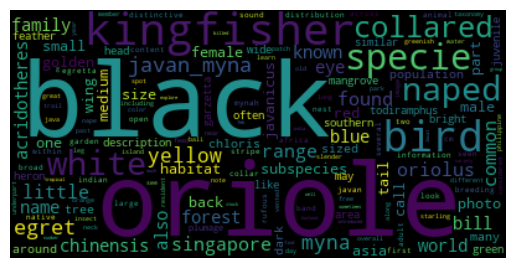

In [77]:
freq_dist=FreqDist(txt.split()) #calculate frequency of words that should be a list
cloud=WordCloud().generate_from_frequencies(freq_dist) #generate word cloud
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
data.to_csv('230436M_cleaned_data.csv')

In [ ]:
data['species'].unique()

Feature Engineering

In [80]:
X = data['cleaned_text']
Y= data['species']

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_train

508    jul rufous collared kingfisher rufous collared...
152    understanding genetic basis convergence broad ...
688    hong kong bird watching society hkbws initiate...
220    apr collared kingfisher todirhamphus chloris c...
184    content introduction little owl frankfurt germ...
                             ...                        
79     large coastal kingfisher gleaming white head t...
352    giant kingfisher trail follows jungly river re...
241    collared kingfisher feed mainly insect small r...
61     altamira oriole audubon oriole robert mcquade ...
682    khor kalba conservation reserve managed enviro...
Name: cleaned_text, Length: 427, dtype: object

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(stop_words='english', ngram_range=(1,3))
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test) #make sure X_test is TRANSFORM and not fit_transform

#print dimensions and features 
print(f"""
training: {X_train_cv.toarray().shape}
test: {X_test_cv.toarray().shape}

features: {cv.get_feature_names_out()}
      """)


training: (427, 15748)
test: (184, 15748)

features: ['aa' 'aa sitesettingsid' 'ability' ... 'zoonosis' 'zoonosis singapore'
 'zoonosis singapore ban']
      


In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs')

#train
lr.fit(X_train_cv, y_train)

#apply to test
y_pred_cv=lr.predict(X_test_cv)
y_pred_cv

array(['Javan Myna', 'Javan Myna', 'Collared Kingfisher',
       'Collared Kingfisher', 'Collared Kingfisher', 'Black-naped Oriole',
       'Javan Myna', 'Collared Kingfisher', 'Javan Myna', 'Javan Myna',
       'Black-naped Oriole', 'Black-naped Oriole', 'Black-naped Oriole',
       'Little Egret', 'Black-naped Oriole', 'Little Egret',
       'Collared Kingfisher', 'Black-naped Oriole', 'Black-naped Oriole',
       'Collared Kingfisher', 'Little Egret', 'Black-naped Oriole',
       'Black-naped Oriole', 'Black-naped Oriole', 'Javan Myna',
       'Collared Kingfisher', 'Black-naped Oriole', 'Collared Kingfisher',
       'Javan Myna', 'Little Egret', 'Collared Kingfisher',
       'Black-naped Oriole', 'Collared Kingfisher', 'Collared Kingfisher',
       'Javan Myna', 'Javan Myna', 'Javan Myna', 'Collared Kingfisher',
       'Black-naped Oriole', 'Collared Kingfisher', 'Black-naped Oriole',
       'Javan Myna', 'Javan Myna', 'Black-naped Oriole', 'Javan Myna',
       'Black-naped Oriole'

In [84]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

array([[56,  1,  1,  0],
       [ 1, 41,  1,  0],
       [ 2,  0, 45,  0],
       [ 7,  0,  2, 27]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

                     precision    recall  f1-score   support

 Black-naped Oriole       0.85      0.97      0.90        58
Collared Kingfisher       0.98      0.95      0.96        43
         Javan Myna       0.92      0.96      0.94        47
       Little Egret       1.00      0.75      0.86        36

           accuracy                           0.92       184
          macro avg       0.94      0.91      0.92       184
       weighted avg       0.93      0.92      0.92       184



In [86]:
#MAIN DIFFERENCE IN CODE
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()

#train
nb.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=nb.predict(X_test_cv)
# y_pred_cv

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

In [ ]:
#MAIN DIFFERENCE IN CODE
from sklearn import svm

supportvector=svm.LinearSVC()
#train
supportvector.fit(X_train_cv, y_train)

#move to X_test
y_pred_cv=supportvector.predict(X_test_cv)
# y_pred_cv

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_cv)
cm

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv, target_names=['Black-naped Oriole','Collared Kingfisher','Javan Myna','Little Egret']))

In [ ]:
testset=pd.read_excel('Data_test.xlsx')
testset.head()

In [ ]:
testset.drop_duplicates(inplace=True)
testset.dropna(inplace=True)
testset['cleaned_text'] = testset['description'].apply(preprocess_text)
testset.head()

In [ ]:
test=testset['cleaned_text'].to_list()
print(test)
vector=cv.transform(test)
testset['log_reg_pred']=(lr.predict(vector))[0]

In [ ]:
testset.head()

In [ ]:
testset['naive_bayes_pred']=(nb.predict(vector))[0]

In [ ]:
testset.to_excel('Tested_set.xlsx')

In [ ]:
def accuracy(df): 
    # Calculate True Positives (TP): cases where prediction matches the actual species
    correct_predictions = df['species'] == df['naive_bayes_pred']
    tp = correct_predictions.sum()
    
    # Calculate total records
    total_records = len(df)
    
    # Calculate accuracy
    accuracy = tp / total_records if total_records > 0 else 0
    
    # Calculate False Positives (FP): cases where the prediction is wrong
    false_positives = (~correct_predictions).sum()
    
    return accuracy
    
accuracy(testset)